### 1.0.1 Imports

In [1]:
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline

## 1.1 Data

In [5]:
rate_df = pd.read_csv('data/Rate_PUF.csv')
rate_df.fillna(np.nan, inplace = True)
rate_df.shape

(2005187, 21)

In [4]:
rate_df.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,...,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2019,AK,21989,HIOS,2018-10-16 03:20:23,93-0438772,2019-01-01,2019-03-31,21989AK0080001,Rating Area 1,...,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41
1,2019,AK,21989,HIOS,2018-10-16 03:20:23,93-0438772,2019-01-01,2019-03-31,21989AK0080001,Rating Area 2,...,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41
2,2019,AK,21989,HIOS,2018-10-16 03:20:23,93-0438772,2019-01-01,2019-03-31,21989AK0080001,Rating Area 3,...,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41
3,2019,AK,21989,HIOS,2018-10-16 03:20:23,93-0438772,2019-01-01,2019-03-31,21989AK0080002,Rating Area 1,...,Family Option,59.24,NaN,123.22,142.18,142.18,142.18,212.08,212.08,212.08
4,2019,AK,21989,HIOS,2018-10-16 03:20:23,93-0438772,2019-01-01,2019-03-31,21989AK0080002,Rating Area 2,...,Family Option,59.24,NaN,123.22,142.18,142.18,142.18,212.08,212.08,212.08


# 2 EDA

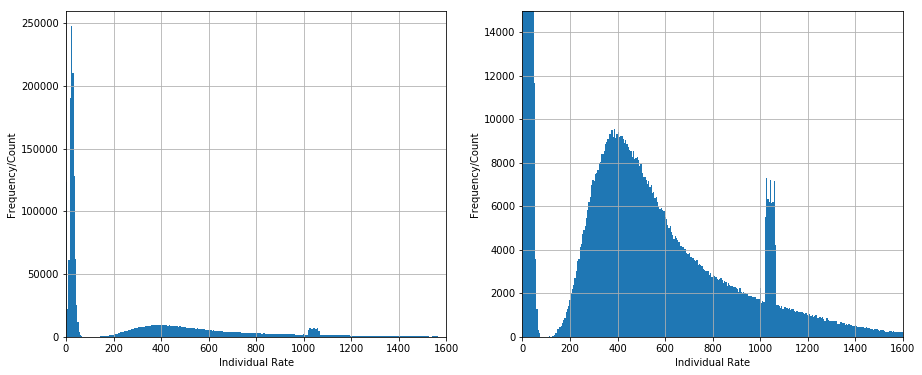

In [25]:
df = rate_df[rate_df.IndividualRate < 1600]
plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

plt.subplot(121)
df.IndividualRate.hist(bins = 300)
plt.xlim([0,1600])
plt.ylabel('Frequency/Count')
plt.xlabel('Individual Rate')

plt.subplot(122) # zoom in on area of interest
df.IndividualRate.hist(bins = 300)
plt.ylim([0,15000])
plt.xlim([0,1600])
plt.ylabel('Frequency/Count')
plt.xlabel('Individual Rate')
plt.show()

Immediateliy we see 3 things happening with our spread of Individual Rates. There's of course a strong concentration between 0 and 100, then there's a left skewed distribution spread around 400, and then there's a strange clump just above 1000. We see this more clearly on the right plot where I've zoomed in.

In [26]:
rate_df.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'ImportDate',
       'FederalTIN', 'RateEffectiveDate', 'RateExpirationDate', 'PlanId',
       'RatingAreaId', 'Tobacco', 'Age', 'IndividualRate',
       'IndividualTobaccoRate', 'Couple', 'PrimarySubscriberAndOneDependent',
       'PrimarySubscriberAndTwoDependents',
       'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
       'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents'],
      dtype='object')